In [1]:
#!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time
from catboost import Pool
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
test = pd.read_csv('./data/test.csv')

In [4]:
df = pd.read_pickle('C:/Users/sara/Documents/빅데이터지능형서비스개발과정/kaggle/data_1.pkl')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8032887 entries, 827691 to 8860577
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   month_id                    int8   
 1   shop_id                     int8   
 2   item_id                     int16  
 3   cnt_month                   float32
 4   city_id                     int8   
 5   cat_id                      int8   
 6   main_cat                    int8   
 7   sub_cat                     int8   
 8   year                        int16  
 9   month                       int8   
 10  sales_month                 int8   
 11  cnt_month_1                 float32
 12  cnt_month_2                 float32
 13  cnt_month_3                 float32
 14  item_id_mean_cnt_1          float32
 15  item_id_mean_cnt_2          float32
 16  item_id_mean_cnt_3          float32
 17  sub_cat_mean_cnt_1          float32
 18  sub_cat_mean_cnt_2          float32
 19  sub_cat_mean_cnt

In [6]:
df.head()

,month_id,shop_id,item_id,cnt_month,city_id,cat_id,main_cat,sub_cat,year,month,...,sub_cat_mean_cnt_3,price_mean_mean_cnt_1,price_mean_mean_cnt_2,price_mean_mean_cnt_3,item_id/city_id_mean_cnt_1,item_id/city_id_mean_cnt_2,item_id/city_id_mean_cnt_3,shop_id/cat_id_mean_cnt_1,shop_id/cat_id_mean_cnt_2,shop_id/cat_id_mean_cnt_3
827691,3,25,8092,3.0,13,40,11,6,2013,4,...,0.0,1.400024,1.365631,0.0,1.000000,2.142857,0.0,1.087262,1.048394,0.0
827692,3,25,7850,3.0,13,30,8,54,2013,4,...,0.0,1.479122,1.464680,0.0,3.714286,2.285714,0.0,3.651685,2.276650,0.0
827693,3,25,8051,3.0,13,66,14,47,2013,4,...,0.0,0.000000,0.000000,0.0,0.000000,0.428571,0.0,1.827586,1.389474,0.0
827694,3,25,8088,1.0,13,55,13,4,2013,4,...,0.0,1.479122,0.000000,0.0,0.285714,0.000000,0.0,0.598291,0.562107,0.0
827695,3,25,8089,1.0,13,55,13,4,2013,4,...,0.0,0.000000,0.000000,0.0,0.571429,0.000000,0.0,0.598291,0.562107,0.0


In [7]:
s = ['cnt_month', 'cnt_month_1','cnt_month_2', 'cnt_month_3', 'item_id_mean_cnt_1','item_id_mean_cnt_2', 'item_id_mean_cnt_3', 
        'sub_cat_mean_cnt_1','sub_cat_mean_cnt_2', 'sub_cat_mean_cnt_3', 'price_mean_mean_cnt_1',
       'price_mean_mean_cnt_2', 'price_mean_mean_cnt_3','item_id/city_id_mean_cnt_1', 'item_id/city_id_mean_cnt_2',
       'item_id/city_id_mean_cnt_3', 'shop_id/cat_id_mean_cnt_1','shop_id/cat_id_mean_cnt_2', 'shop_id/cat_id_mean_cnt_3']

In [8]:
# value clip(0~20)
df[s] = df[s].clip(0, 20)

In [9]:
# train/validation/test data split
X_train = df[df['month_id'] < 33].drop(['cnt_month'], axis=1)
Y_train = df[df['month_id'] < 33]['cnt_month']

X_valid = df[df['month_id'] == 33].drop(['cnt_month'], axis=1)
Y_valid = df[df['month_id'] == 33]['cnt_month']

X_test = df[df['month_id'] == 34].drop(['cnt_month'], axis=1)

In [10]:
model = CatBoostRegressor()

In [11]:
ts = time.time()
model.fit(
    X_train, Y_train, 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)],  # 유효성 검사 데이터 세트
    )

print('소요시간: ',time.time()-ts)

Learning rate set to 0.207088
0:	learn: 1.1446673	test: 1.1446673	test1: 1.0109381	best: 1.0109381 (0)	total: 1.2s	remaining: 19m 58s
1:	learn: 1.0842969	test: 1.0842969	test1: 0.9667586	best: 0.9667586 (1)	total: 2.11s	remaining: 17m 31s
2:	learn: 1.0420578	test: 1.0420578	test1: 0.9350629	best: 0.9350629 (2)	total: 3.04s	remaining: 16m 50s
3:	learn: 1.0118403	test: 1.0118403	test1: 0.9154931	best: 0.9154931 (3)	total: 3.97s	remaining: 16m 28s
4:	learn: 0.9892005	test: 0.9892005	test1: 0.8988352	best: 0.8988352 (4)	total: 4.9s	remaining: 16m 15s
5:	learn: 0.9739849	test: 0.9739849	test1: 0.8906308	best: 0.8906308 (5)	total: 6.01s	remaining: 16m 36s
6:	learn: 0.9628663	test: 0.9628663	test1: 0.8832208	best: 0.8832208 (6)	total: 7.11s	remaining: 16m 48s
7:	learn: 0.9532617	test: 0.9532617	test1: 0.8759098	best: 0.8759098 (7)	total: 8.46s	remaining: 17m 29s
8:	learn: 0.9467698	test: 0.9467698	test1: 0.8720911	best: 0.8720911 (8)	total: 9.48s	remaining: 17m 23s
9:	learn: 0.9421447	test: 0

77:	learn: 0.8794645	test: 0.8794645	test1: 0.8296457	best: 0.8285060 (71)	total: 1m 31s	remaining: 17m 57s
78:	learn: 0.8791501	test: 0.8791501	test1: 0.8300726	best: 0.8285060 (71)	total: 1m 32s	remaining: 17m 57s
79:	learn: 0.8787535	test: 0.8787535	test1: 0.8296372	best: 0.8285060 (71)	total: 1m 33s	remaining: 17m 58s
80:	learn: 0.8784737	test: 0.8784737	test1: 0.8296349	best: 0.8285060 (71)	total: 1m 34s	remaining: 17m 57s
81:	learn: 0.8782963	test: 0.8782963	test1: 0.8295365	best: 0.8285060 (71)	total: 1m 36s	remaining: 18m 1s
82:	learn: 0.8780790	test: 0.8780790	test1: 0.8291845	best: 0.8285060 (71)	total: 1m 38s	remaining: 18m 3s
83:	learn: 0.8777529	test: 0.8777529	test1: 0.8290753	best: 0.8285060 (71)	total: 1m 39s	remaining: 18m 2s
84:	learn: 0.8769568	test: 0.8769568	test1: 0.8289514	best: 0.8285060 (71)	total: 1m 40s	remaining: 18m 4s
85:	learn: 0.8766050	test: 0.8766050	test1: 0.8284433	best: 0.8284433 (85)	total: 1m 42s	remaining: 18m 5s
86:	learn: 0.8759970	test: 0.8759

153:	learn: 0.8594729	test: 0.8594729	test1: 0.8243569	best: 0.8213982 (142)	total: 3m 3s	remaining: 16m 46s
154:	learn: 0.8593510	test: 0.8593510	test1: 0.8244679	best: 0.8213982 (142)	total: 3m 4s	remaining: 16m 43s
155:	learn: 0.8591127	test: 0.8591127	test1: 0.8244420	best: 0.8213982 (142)	total: 3m 5s	remaining: 16m 42s
156:	learn: 0.8590161	test: 0.8590161	test1: 0.8243619	best: 0.8213982 (142)	total: 3m 6s	remaining: 16m 42s
157:	learn: 0.8583866	test: 0.8583866	test1: 0.8234241	best: 0.8213982 (142)	total: 3m 7s	remaining: 16m 41s
158:	learn: 0.8582297	test: 0.8582297	test1: 0.8234073	best: 0.8213982 (142)	total: 3m 9s	remaining: 16m 40s
159:	learn: 0.8580665	test: 0.8580665	test1: 0.8233431	best: 0.8213982 (142)	total: 3m 10s	remaining: 16m 38s
160:	learn: 0.8577912	test: 0.8577912	test1: 0.8233009	best: 0.8213982 (142)	total: 3m 11s	remaining: 16m 37s
161:	learn: 0.8575208	test: 0.8575208	test1: 0.8233676	best: 0.8213982 (142)	total: 3m 12s	remaining: 16m 35s
162:	learn: 0.85

228:	learn: 0.8484023	test: 0.8484023	test1: 0.8212343	best: 0.8212343 (228)	total: 4m 31s	remaining: 15m 12s
229:	learn: 0.8482151	test: 0.8482151	test1: 0.8211918	best: 0.8211918 (229)	total: 4m 32s	remaining: 15m 11s
230:	learn: 0.8479484	test: 0.8479484	test1: 0.8214166	best: 0.8211918 (229)	total: 4m 33s	remaining: 15m 10s
231:	learn: 0.8475554	test: 0.8475554	test1: 0.8216201	best: 0.8211918 (229)	total: 4m 35s	remaining: 15m 10s
232:	learn: 0.8472612	test: 0.8472612	test1: 0.8211409	best: 0.8211409 (232)	total: 4m 36s	remaining: 15m 10s
233:	learn: 0.8469976	test: 0.8469976	test1: 0.8207702	best: 0.8207702 (233)	total: 4m 37s	remaining: 15m 9s
234:	learn: 0.8469081	test: 0.8469081	test1: 0.8207307	best: 0.8207307 (234)	total: 4m 39s	remaining: 15m 8s
235:	learn: 0.8467273	test: 0.8467273	test1: 0.8207819	best: 0.8207307 (234)	total: 4m 40s	remaining: 15m 7s
236:	learn: 0.8466524	test: 0.8466524	test1: 0.8207677	best: 0.8207307 (234)	total: 4m 41s	remaining: 15m 6s
237:	learn: 0.

303:	learn: 0.8392773	test: 0.8392773	test1: 0.8247947	best: 0.8202662 (238)	total: 6m	remaining: 13m 45s
304:	learn: 0.8392157	test: 0.8392157	test1: 0.8247096	best: 0.8202662 (238)	total: 6m 1s	remaining: 13m 43s
305:	learn: 0.8391001	test: 0.8391001	test1: 0.8244519	best: 0.8202662 (238)	total: 6m 2s	remaining: 13m 42s
306:	learn: 0.8389670	test: 0.8389670	test1: 0.8240978	best: 0.8202662 (238)	total: 6m 3s	remaining: 13m 41s
307:	learn: 0.8389006	test: 0.8389006	test1: 0.8246826	best: 0.8202662 (238)	total: 6m 5s	remaining: 13m 40s
308:	learn: 0.8388542	test: 0.8388542	test1: 0.8246146	best: 0.8202662 (238)	total: 6m 6s	remaining: 13m 39s
309:	learn: 0.8387693	test: 0.8387693	test1: 0.8245672	best: 0.8202662 (238)	total: 6m 7s	remaining: 13m 38s
310:	learn: 0.8386696	test: 0.8386696	test1: 0.8246928	best: 0.8202662 (238)	total: 6m 8s	remaining: 13m 36s
311:	learn: 0.8385716	test: 0.8385716	test1: 0.8246918	best: 0.8202662 (238)	total: 6m 10s	remaining: 13m 36s
312:	learn: 0.8384966

378:	learn: 0.8316978	test: 0.8316978	test1: 0.8253647	best: 0.8202662 (238)	total: 7m 29s	remaining: 12m 16s
379:	learn: 0.8316140	test: 0.8316140	test1: 0.8245340	best: 0.8202662 (238)	total: 7m 30s	remaining: 12m 15s
380:	learn: 0.8315417	test: 0.8315417	test1: 0.8244341	best: 0.8202662 (238)	total: 7m 31s	remaining: 12m 13s
381:	learn: 0.8314739	test: 0.8314739	test1: 0.8243916	best: 0.8202662 (238)	total: 7m 32s	remaining: 12m 12s
382:	learn: 0.8313899	test: 0.8313899	test1: 0.8247920	best: 0.8202662 (238)	total: 7m 34s	remaining: 12m 11s
383:	learn: 0.8313211	test: 0.8313211	test1: 0.8251438	best: 0.8202662 (238)	total: 7m 35s	remaining: 12m 10s
384:	learn: 0.8311653	test: 0.8311653	test1: 0.8252482	best: 0.8202662 (238)	total: 7m 36s	remaining: 12m 9s
385:	learn: 0.8311182	test: 0.8311182	test1: 0.8245192	best: 0.8202662 (238)	total: 7m 37s	remaining: 12m 7s
386:	learn: 0.8309396	test: 0.8309396	test1: 0.8243931	best: 0.8202662 (238)	total: 7m 38s	remaining: 12m 6s
387:	learn: 0

453:	learn: 0.8251494	test: 0.8251494	test1: 0.8250258	best: 0.8202662 (238)	total: 8m 59s	remaining: 10m 48s
454:	learn: 0.8251213	test: 0.8251213	test1: 0.8262154	best: 0.8202662 (238)	total: 9m	remaining: 10m 47s
455:	learn: 0.8250094	test: 0.8250094	test1: 0.8260949	best: 0.8202662 (238)	total: 9m 1s	remaining: 10m 46s
456:	learn: 0.8249576	test: 0.8249576	test1: 0.8261306	best: 0.8202662 (238)	total: 9m 3s	remaining: 10m 45s
457:	learn: 0.8249049	test: 0.8249049	test1: 0.8260883	best: 0.8202662 (238)	total: 9m 4s	remaining: 10m 44s
458:	learn: 0.8248657	test: 0.8248657	test1: 0.8260442	best: 0.8202662 (238)	total: 9m 5s	remaining: 10m 43s
459:	learn: 0.8245068	test: 0.8245068	test1: 0.8262624	best: 0.8202662 (238)	total: 9m 7s	remaining: 10m 42s
460:	learn: 0.8244178	test: 0.8244178	test1: 0.8261601	best: 0.8202662 (238)	total: 9m 9s	remaining: 10m 42s
461:	learn: 0.8242585	test: 0.8242585	test1: 0.8259924	best: 0.8202662 (238)	total: 9m 10s	remaining: 10m 41s
462:	learn: 0.824202

528:	learn: 0.8191787	test: 0.8191787	test1: 0.8282887	best: 0.8202662 (238)	total: 10m 25s	remaining: 9m 16s
529:	learn: 0.8191539	test: 0.8191539	test1: 0.8279635	best: 0.8202662 (238)	total: 10m 26s	remaining: 9m 15s
530:	learn: 0.8190965	test: 0.8190965	test1: 0.8279980	best: 0.8202662 (238)	total: 10m 27s	remaining: 9m 14s
531:	learn: 0.8190488	test: 0.8190488	test1: 0.8279996	best: 0.8202662 (238)	total: 10m 28s	remaining: 9m 12s
532:	learn: 0.8189908	test: 0.8189908	test1: 0.8277268	best: 0.8202662 (238)	total: 10m 29s	remaining: 9m 11s
533:	learn: 0.8188766	test: 0.8188766	test1: 0.8274774	best: 0.8202662 (238)	total: 10m 31s	remaining: 9m 10s
534:	learn: 0.8188317	test: 0.8188317	test1: 0.8274548	best: 0.8202662 (238)	total: 10m 32s	remaining: 9m 9s
535:	learn: 0.8187904	test: 0.8187904	test1: 0.8275023	best: 0.8202662 (238)	total: 10m 32s	remaining: 9m 7s
536:	learn: 0.8187588	test: 0.8187588	test1: 0.8275098	best: 0.8202662 (238)	total: 10m 34s	remaining: 9m 6s
537:	learn: 0

603:	learn: 0.8140515	test: 0.8140515	test1: 0.8331393	best: 0.8202662 (238)	total: 11m 44s	remaining: 7m 42s
604:	learn: 0.8140241	test: 0.8140241	test1: 0.8331379	best: 0.8202662 (238)	total: 11m 45s	remaining: 7m 40s
605:	learn: 0.8139886	test: 0.8139886	test1: 0.8331157	best: 0.8202662 (238)	total: 11m 46s	remaining: 7m 39s
606:	learn: 0.8139616	test: 0.8139616	test1: 0.8330990	best: 0.8202662 (238)	total: 11m 47s	remaining: 7m 38s
607:	learn: 0.8139193	test: 0.8139193	test1: 0.8331300	best: 0.8202662 (238)	total: 11m 48s	remaining: 7m 37s
608:	learn: 0.8138975	test: 0.8138975	test1: 0.8332781	best: 0.8202662 (238)	total: 11m 49s	remaining: 7m 35s
609:	learn: 0.8138547	test: 0.8138547	test1: 0.8331642	best: 0.8202662 (238)	total: 11m 51s	remaining: 7m 34s
610:	learn: 0.8135821	test: 0.8135821	test1: 0.8331428	best: 0.8202662 (238)	total: 11m 52s	remaining: 7m 33s
611:	learn: 0.8135326	test: 0.8135326	test1: 0.8330812	best: 0.8202662 (238)	total: 11m 53s	remaining: 7m 32s
612:	learn

678:	learn: 0.8101553	test: 0.8101553	test1: 0.8339010	best: 0.8202662 (238)	total: 13m 6s	remaining: 6m 11s
679:	learn: 0.8101314	test: 0.8101314	test1: 0.8339162	best: 0.8202662 (238)	total: 13m 7s	remaining: 6m 10s
680:	learn: 0.8100300	test: 0.8100300	test1: 0.8338011	best: 0.8202662 (238)	total: 13m 8s	remaining: 6m 9s
681:	learn: 0.8098315	test: 0.8098315	test1: 0.8333916	best: 0.8202662 (238)	total: 13m 9s	remaining: 6m 8s
682:	learn: 0.8097903	test: 0.8097903	test1: 0.8334069	best: 0.8202662 (238)	total: 13m 10s	remaining: 6m 6s
683:	learn: 0.8097381	test: 0.8097381	test1: 0.8334784	best: 0.8202662 (238)	total: 13m 11s	remaining: 6m 5s
684:	learn: 0.8096361	test: 0.8096361	test1: 0.8334890	best: 0.8202662 (238)	total: 13m 12s	remaining: 6m 4s
685:	learn: 0.8095313	test: 0.8095313	test1: 0.8334380	best: 0.8202662 (238)	total: 13m 13s	remaining: 6m 3s
686:	learn: 0.8094892	test: 0.8094892	test1: 0.8337553	best: 0.8202662 (238)	total: 13m 14s	remaining: 6m 2s
687:	learn: 0.8094584

753:	learn: 0.8055383	test: 0.8055383	test1: 0.8274605	best: 0.8202662 (238)	total: 14m 27s	remaining: 4m 43s
754:	learn: 0.8050980	test: 0.8050980	test1: 0.8274935	best: 0.8202662 (238)	total: 14m 29s	remaining: 4m 42s
755:	learn: 0.8050537	test: 0.8050537	test1: 0.8274554	best: 0.8202662 (238)	total: 14m 30s	remaining: 4m 40s
756:	learn: 0.8050355	test: 0.8050355	test1: 0.8273953	best: 0.8202662 (238)	total: 14m 31s	remaining: 4m 39s
757:	learn: 0.8050052	test: 0.8050052	test1: 0.8270685	best: 0.8202662 (238)	total: 14m 32s	remaining: 4m 38s
758:	learn: 0.8049797	test: 0.8049797	test1: 0.8271113	best: 0.8202662 (238)	total: 14m 33s	remaining: 4m 37s
759:	learn: 0.8049263	test: 0.8049263	test1: 0.8270582	best: 0.8202662 (238)	total: 14m 34s	remaining: 4m 36s
760:	learn: 0.8048946	test: 0.8048946	test1: 0.8270781	best: 0.8202662 (238)	total: 14m 36s	remaining: 4m 35s
761:	learn: 0.8048717	test: 0.8048717	test1: 0.8270610	best: 0.8202662 (238)	total: 14m 37s	remaining: 4m 33s
762:	learn

828:	learn: 0.8016067	test: 0.8016067	test1: 0.8379283	best: 0.8202662 (238)	total: 15m 50s	remaining: 3m 16s
829:	learn: 0.8015725	test: 0.8015725	test1: 0.8378316	best: 0.8202662 (238)	total: 15m 51s	remaining: 3m 14s
830:	learn: 0.8015587	test: 0.8015587	test1: 0.8378269	best: 0.8202662 (238)	total: 15m 52s	remaining: 3m 13s
831:	learn: 0.8015212	test: 0.8015212	test1: 0.8378051	best: 0.8202662 (238)	total: 15m 53s	remaining: 3m 12s
832:	learn: 0.8014364	test: 0.8014364	test1: 0.8378426	best: 0.8202662 (238)	total: 15m 54s	remaining: 3m 11s
833:	learn: 0.8013849	test: 0.8013849	test1: 0.8378431	best: 0.8202662 (238)	total: 15m 55s	remaining: 3m 10s
834:	learn: 0.8013502	test: 0.8013502	test1: 0.8379038	best: 0.8202662 (238)	total: 15m 56s	remaining: 3m 9s
835:	learn: 0.8013004	test: 0.8013004	test1: 0.8378867	best: 0.8202662 (238)	total: 15m 57s	remaining: 3m 7s
836:	learn: 0.8012529	test: 0.8012529	test1: 0.8378392	best: 0.8202662 (238)	total: 15m 59s	remaining: 3m 6s
837:	learn: 0

903:	learn: 0.7982232	test: 0.7982232	test1: 0.8401855	best: 0.8202662 (238)	total: 17m 10s	remaining: 1m 49s
904:	learn: 0.7981939	test: 0.7981939	test1: 0.8402223	best: 0.8202662 (238)	total: 17m 11s	remaining: 1m 48s
905:	learn: 0.7981620	test: 0.7981620	test1: 0.8402332	best: 0.8202662 (238)	total: 17m 12s	remaining: 1m 47s
906:	learn: 0.7981319	test: 0.7981319	test1: 0.8402373	best: 0.8202662 (238)	total: 17m 14s	remaining: 1m 46s
907:	learn: 0.7981111	test: 0.7981111	test1: 0.8402288	best: 0.8202662 (238)	total: 17m 14s	remaining: 1m 44s
908:	learn: 0.7980950	test: 0.7980950	test1: 0.8402646	best: 0.8202662 (238)	total: 17m 16s	remaining: 1m 43s
909:	learn: 0.7980011	test: 0.7980011	test1: 0.8402373	best: 0.8202662 (238)	total: 17m 17s	remaining: 1m 42s
910:	learn: 0.7979813	test: 0.7979813	test1: 0.8402071	best: 0.8202662 (238)	total: 17m 18s	remaining: 1m 41s
911:	learn: 0.7979682	test: 0.7979682	test1: 0.8402183	best: 0.8202662 (238)	total: 17m 19s	remaining: 1m 40s
912:	learn

979:	learn: 0.7942245	test: 0.7942245	test1: 0.8432642	best: 0.8202662 (238)	total: 18m 31s	remaining: 22.7s
980:	learn: 0.7941819	test: 0.7941819	test1: 0.8431815	best: 0.8202662 (238)	total: 18m 33s	remaining: 21.6s
981:	learn: 0.7941533	test: 0.7941533	test1: 0.8431571	best: 0.8202662 (238)	total: 18m 34s	remaining: 20.4s
982:	learn: 0.7941133	test: 0.7941133	test1: 0.8431610	best: 0.8202662 (238)	total: 18m 35s	remaining: 19.3s
983:	learn: 0.7940795	test: 0.7940795	test1: 0.8433776	best: 0.8202662 (238)	total: 18m 36s	remaining: 18.2s
984:	learn: 0.7940226	test: 0.7940226	test1: 0.8432614	best: 0.8202662 (238)	total: 18m 37s	remaining: 17s
985:	learn: 0.7940010	test: 0.7940010	test1: 0.8432792	best: 0.8202662 (238)	total: 18m 38s	remaining: 15.9s
986:	learn: 0.7939829	test: 0.7939829	test1: 0.8433062	best: 0.8202662 (238)	total: 18m 39s	remaining: 14.7s
987:	learn: 0.7939547	test: 0.7939547	test1: 0.8431876	best: 0.8202662 (238)	total: 18m 40s	remaining: 13.6s
988:	learn: 0.7937552

In [12]:
Y_pred = model.predict(X_valid)

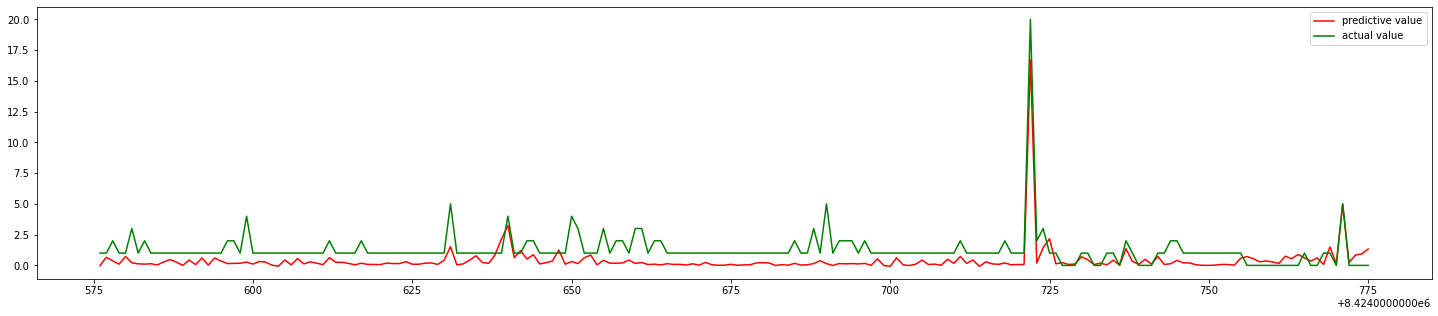

In [13]:
submission = pd.DataFrame({
    "ID": X_valid.index, 
    "item_cnt_month": Y_pred
})
x = submission['ID'].head(200)
y_pred = submission['item_cnt_month'].head(200)
y_true = Y_valid.head(200)
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(111)
ax.plot(x, y_pred, label = 'predictive value', color = 'red')
ax.plot(x, y_true, label = 'actual value', color = 'green')

ax.legend()

plt.show()

In [14]:
Y_test = model.predict(X_test)

In [15]:
# 제출 파일 생성
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('./submission/submission_CatBoost_2022022701.csv', index=False)